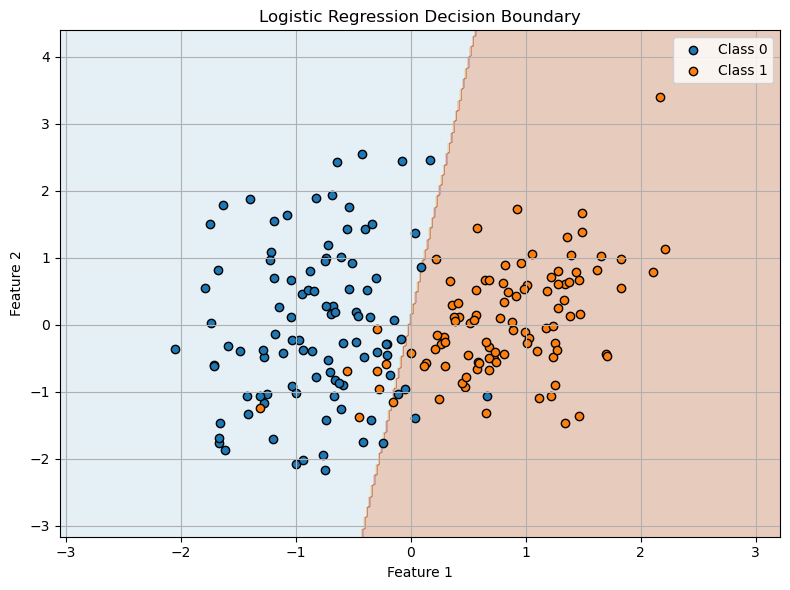

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Generate synthetic 2D classification data
X, y = make_classification(n_samples=200,  # total samples
                          n_features=2,    # 2D data for plotting
                          n_redundant=0,   # no redundant features
                          n_clusters_per_class=1,
                          class_sep=1.5,   # controls class separation
                          random_state=42)

# Step 2: Standardize features for better convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train logistic regression model
model = LogisticRegression()
model.fit(X_scaled, y)

# Step 4: Plot decision boundary
# Create meshgrid over feature space
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict probabilities over grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot filled contour and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
plt.scatter(X_scaled[y == 0][:, 0], X_scaled[y == 0][:, 1], label='Class 0', edgecolor='k')
plt.scatter(X_scaled[y == 1][:, 0], X_scaled[y == 1][:, 1], label='Class 1', edgecolor='k')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig("logistic_decision_boundary.png")
plt.show()